Melhor valor de K: 14
Melhor acurácia: 90.49%

Melhor resultado de teste com cross validade: 0.9228441754916793
Melhor resultado de treino com cross validade: 0.9259134817303654


Especificidade: 0.88, Precisão: 0.88, Recall: 0.93, Roc_auc: 0.90, F1: 0.91


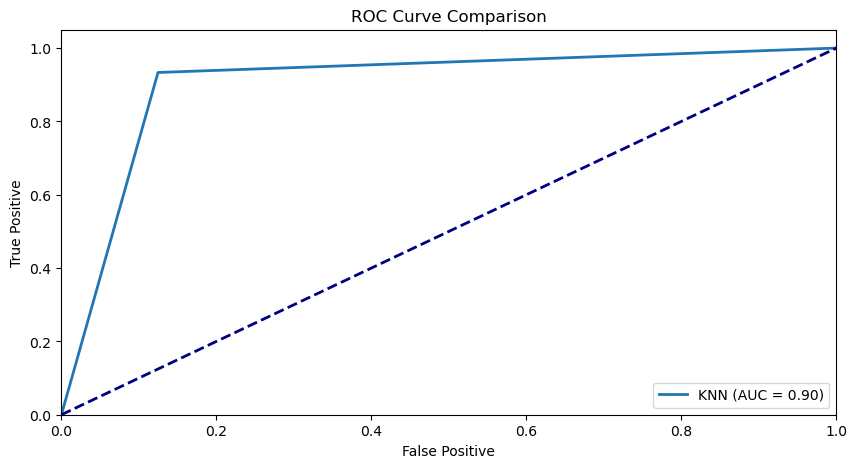

' As métricas são muito importantes para entender o desempenho, a capacidade de predição e aprecisão de um modelo de machine learning. Apenas uma métrica, como a acurácia, não é suficiente para demonstrar uma visão completa da eficácia do modelo, por isso, analisar diferentes figuras de mérito é uma etapa fundamental no desenvolvimento de modelos.\nNo modelo em questão, a métrica com maior valor foi o recall/sensibilidade, com um valor em torno de 93%, indicando que o modelo é muito eficaz em identificar corretamente notícias verdadeiras.As métricas com valores mais baixos foram a especificidade e a precisão, ambas com cerca de 88%, demonstrando que embora o modelo acerte a maioria dos casos positivos, ainda pode ter alguma dificuldade em identificar todas as notícias falsas. Entretanto, o F1-score de 90% deixa claro a consistência do modelo com um bom equilíbrio entre precisão e recall. \nAlém disso, a acurácia e o ROC AUC indicam que o modelo possui bom desempenho geral, a acurácia a

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

def lendo_csv (csv):
  df = pd.read_csv(csv, header = None)
  return df

def criando_df(df, n_target):
  df = pd.DataFrame({'News': df[0], 'Target': n_target})
  return df


def calcula_especificidade (y_true, y_pred):
  mc = confusion_matrix (y_true, y_pred)
  ((TN, FP), (FN, TP)) = mc

  especificidade = TN / (TN + FP)
  return  especificidade


def calcular_metricas (y_true, y_pred):
  precisao = precision_score (y_true, y_pred, zero_division=0)
  recall  = recall_score (y_true, y_pred)
  f1score = f1_score (y_true, y_pred)
  roc_auc = roc_auc_score (y_true, y_pred)
  return (precisao, recall, f1score, roc_auc)


random_seed = 42
np.random.seed(random_seed)

#Criando DataFrame:

df_true = lendo_csv('content/True.csv')
df_fake = lendo_csv('content/Fake.csv')

df_true = criando_df(df_true, 1)
df_fake = criando_df(df_fake, 0)

df_fake_news = pd.concat([df_true, df_fake], ignore_index=True)

# 1. Criação das features:

X_train, X_test, y_train, y_test = train_test_split(df_fake_news['News'],df_fake_news['Target'], train_size=0.70, random_state=random_seed)

vectorizer = TfidfVectorizer()

treino = vectorizer.fit_transform(X_train)
teste = vectorizer.transform(X_test)
classe = df_fake_news['Target']


# 2. Criação modelo K-Nearest Neighbors (KNN), explorando diferentes valores de K.

ks = range(1, 17)
best_k = 0
results_knn = []


for k in ks:
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(treino, y_train)

  pred = knn.predict(teste)
  accuracy = accuracy_score(y_test, pred)

  acuracia = {}
  acuracia['Acurácia'] = accuracy
  acuracia['K'] = k
  results_knn.append(acuracia)



melhor_resultado = max(results_knn, key=lambda x: x['Acurácia'])
best_k = melhor_resultado['K']

print('Melhor valor de K:',best_k)
print(f"Melhor acurácia: {melhor_resultado['Acurácia'] * 100:.2f}%")

# 3. Avaliação de Modelos com cross validate:

kf = KFold(n_splits= 10 , shuffle=True, random_state=random_seed)

knn = KNeighborsClassifier(n_neighbors= best_k)
knn_cross_validate = cross_validate(knn, treino, y_train, cv=kf, return_train_score=True)

print("\nMelhor resultado de teste com cross validade:", max(knn_cross_validate['test_score']))
print("Melhor resultado de treino com cross validade:", max(knn_cross_validate['train_score']))


# 4. Valiação de Classificadores Binários: 

especificidade= calcula_especificidade(y_test, pred)
precisao, recall, f1score, roc_auc = calcular_metricas(y_test, pred)

print(f"\n\nEspecificidade: {especificidade:.2f}, "
  f"Precisão: {precisao:.2f}, "
  f"Recall: {recall:.2f}, "
  f"Roc_auc: {roc_auc:.2f}, "
  f"F1: {f1score:.2f}")


# Grafico da curva ROC

plt.figure(figsize=(10, 5))

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'KNN (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


# 5. Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

''' As métricas são muito importantes para entender o desempenho, a capacidade de predição e aprecisão de um modelo de machine learning. Apenas uma métrica, como a acurácia, não é suficiente para demonstrar uma visão completa da eficácia do modelo, por isso, analisar diferentes figuras de mérito é uma etapa fundamental no desenvolvimento de modelos.
No modelo em questão, a métrica com maior valor foi o recall/sensibilidade, com um valor em torno de 93%, indicando que o modelo é muito eficaz em identificar corretamente notícias verdadeiras.As métricas com valores mais baixos foram a especificidade e a precisão, ambas com cerca de 88%, demonstrando que embora o modelo acerte a maioria dos casos positivos, ainda pode ter alguma dificuldade em identificar todas as notícias falsas. Entretanto, o F1-score de 90% deixa claro a consistência do modelo com um bom equilíbrio entre precisão e recall. 
Além disso, a acurácia e o ROC AUC indicam que o modelo possui bom desempenho geral, a acurácia ao se manter estável, tanto no teste quanto no treino, ao utilizar o Cross Validade e o ROC AUC com 0.90, confirmando que há uma boa separação entre as classes, indicando que o modelo generaliza muito bem.
Ou seja, o modelo apresenta um desempenho estável, sem viés para nenhuma das classes e demonstra ser equilíbrado o suficientes para ser considerado confiável '''